In [215]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [217]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [220]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [222]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [224]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [226]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [228]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [230]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [211]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

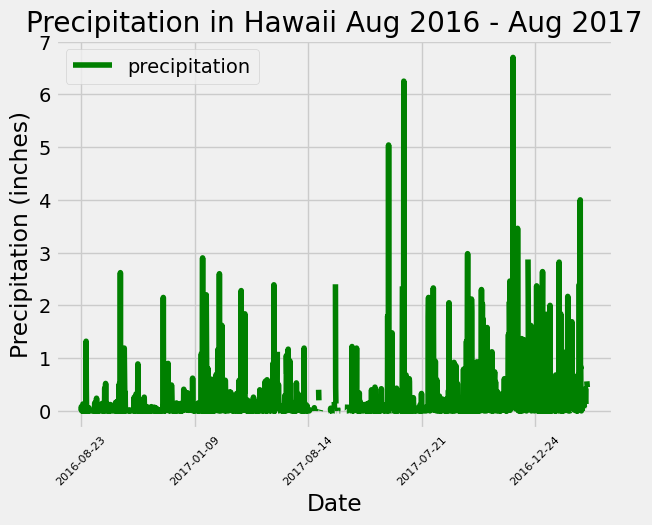

In [241]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
prcp_12mo = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prcp_12mo = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prcp_12mo).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_scores, columns=['date', 'precipitation'])

# Sort the dataframe by date
prcp_df.set_index('date')
prcp_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot('date', 'precipitation', c="g") 
plt.title('Precipitation in Hawaii Aug 2016 - Aug 2017')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45, size = 8)

plt.show()

In [101]:
# Precipitation table
print(prcp_df.head())

         date  precipitation
0  2016-08-23           0.00
1  2016-08-24           0.08
2  2016-08-25           0.08
3  2016-08-26           0.00
4  2016-08-27           0.00


In [111]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.agg({"precipitation": ["count", "mean", "std", "min", "max", "median"]})

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
max,6.700000
median,0.020000


# Exploratory Station Analysis

In [151]:
# Design a query to calculate the total number of stations in the dataset
tot_station = session.query(measurement.station).distinct().count()
tot_station

9

In [157]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(measurement.station,func.count(measurement.station))\
            .group_by(measurement.station)\
            .order_by(func.count(measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [159]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(measurement.tobs),\
                            func.max(measurement.tobs),\
                            func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()
most_active

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'USC00519281 Temperature Observations over last 12mo')

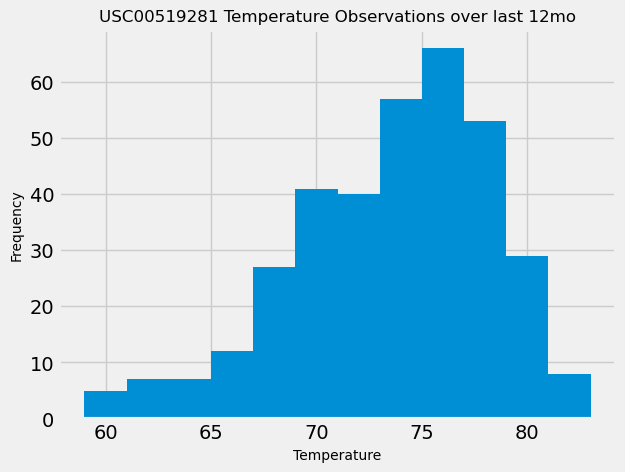

In [243]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temp = session.query(measurement.tobs).filter(measurement.station=='USC00519281').filter(measurement.date>=prcp_12mo).all()
temp_df = pd.DataFrame(most_active_temp, columns=['temperature'])

#histogram
plt.hist(temp_df["temperature"], bins=12)
plt.xlabel("Temperature", size=10)
plt.ylabel("Frequency", size=10)
plt.title("USC00519281 Temperature Observations over last 12mo", size=12)
# plt.legend()

# Close Session

In [16]:
# Close Session
session.close()